# 분석시나리오 6

In [84]:
# Pandas Basics
from IPython.display import Image 
from matplotlib import font_manager, rc
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_excel("data/corona_data.xlsx", sheet_name = "01_지역별소비유형별개인신용카드(결론)")
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777


> 업종 대분류/소분류 구분

In [3]:
gubun = list()

for idx in range(len(df['소비유형코드'])):
    if df['소비유형코드'].str[:2][idx] == '  ':
        gubun.append('소분류')
    else:
        gubun.append('대분류')

df['구분코드'] = gubun
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,229936,225889,235818,249490,238870,250262,235457,246281,223755,대분류
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류


In [4]:
# for문으로 대분류 소비유형코드 붙이기
merc_dae = list()

for x in range(len(df)):
    if df['구분코드'][x]=='대분류':
        merc_dae.append(df['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
df['대분류'] = merc_dae
df = df.fillna(method='ffill')
df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,대분류
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,538807655,550072383,605221466,44936072,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,...,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,합계
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,81715140,79868221,85135882,6717820,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,...,225889,235818,249490,238870,250262,235457,246281,223755,대분류,종합소매
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,15874290,14187834,17180576,1259884,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매


> 소비유형코드 - 업종 : 인덱스로 설정

In [5]:
set_df = df.set_index(['소비유형코드'])
set_df.head()

,통계표,지역코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,2019/02,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,538807655,550072383,605221466,44936072,38921767,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,월간 일평균,백만원,원자료,17706651,18034212,19894480,1449551,1390063,...,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,합계
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,81715140,79868221,85135882,6717820,6046211,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,월간 일평균,백만원,원자료,2686308,2618081,2799349,216704,215936,...,225889,235818,249490,238870,250262,235457,246281,223755,대분류,종합소매
백화점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,15874290,14187834,17180576,1259884,1145085,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매


In [6]:
df_new = set_df[set_df['금액구분코드'] == '총액']
df_new = df_new[df_new['지역코드'] == '전국']
df_new.head()

,통계표,지역코드,금액구분코드,단위,변환,19년,20년,21년,2019/01,2019/02,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,538807655,550072383,605221466,44936072,38921767,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
종합소매,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,81715140,79868221,85135882,6717820,6046211,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
백화점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,15874290,14187834,17180576,1259884,1145085,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매
대형마트/유통전문점,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,33366586,34450924,35365355,2656679,2402706,...,2968141,3102625,3108158,2928618,2988072,2923811,3165932,2575148,소분류,종합소매
슈퍼마켓,7.5.2. 지역별 소비유형별 개인 신용카드,전국,총액,백만원,원자료,21352913,21209923,21489167,1958044,1746519,...,1856760,1931481,1910003,1763608,1762762,1775922,1942293,1565735,소분류,종합소매


>사용 안하는 데이터 삭제

In [7]:
del df_new['통계표']
del df_new['단위']
del df_new['변환']

In [8]:
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,2968141,3102625,3108158,2928618,2988072,2923811,3165932,2575148,소분류,종합소매
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1856760,1931481,1910003,1763608,1762762,1775922,1942293,1565735,소분류,종합소매


>연도별 월평균 매출액 칼럼 생성

In [9]:
df_new['19년월평균매출액'] = df_new['19년'] / 12
df_new['20년월평균매출액'] = df_new['20년'] / 12
df_new['21년월평균매출액'] = df_new['21년'] / 12
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/10,2021/11,2021/12,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,53469616,53827378,53993508,54539492,47029608,대분류,합계,4.490064e+07,4.583937e+07,5.043512e+07
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7404979,7507863,7299173,7634707,6265129,대분류,종합소매,6.809595e+06,6.655685e+06,7.094657e+06
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1720790,1780818,1650980,1604401,1286777,소분류,종합소매,1.322858e+06,1.182320e+06,1.431715e+06
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,2928618,2988072,2923811,3165932,2575148,소분류,종합소매,2.780549e+06,2.870910e+06,2.947113e+06
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1763608,1762762,1775922,1942293,1565735,소분류,종합소매,1.779409e+06,1.767494e+06,1.790764e+06


In [10]:
df_new['19_20증감'] = (df_new['20년월평균매출액'] - df_new['19년월평균매출액']) / df_new['19년월평균매출액'] * 100
df_new['20_21증감'] = (df_new['21년월평균매출액'] - df_new['20년월평균매출액']) / df_new['20년월평균매출액'] * 100
df_new.head()

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액,19_20증감,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,538807655,550072383,605221466,44936072,38921767,44496876,43591233,46109266,...,53993508,54539492,47029608,대분류,합계,4.490064e+07,4.583937e+07,5.043512e+07,2.090677,10.025787
종합소매,전국,총액,81715140,79868221,85135882,6717820,6046211,6697911,6616299,7113120,...,7299173,7634707,6265129,대분류,종합소매,6.809595e+06,6.655685e+06,7.094657e+06,-2.260192,6.595441
백화점,전국,총액,15874290,14187834,17180576,1259884,1145085,1351477,1279599,1390518,...,1650980,1604401,1286777,소분류,종합소매,1.322858e+06,1.182320e+06,1.431715e+06,-10.623820,21.093720
대형마트/유통전문점,전국,총액,33366586,34450924,35365355,2656679,2402706,2609639,2551294,2790584,...,2923811,3165932,2575148,소분류,종합소매,2.780549e+06,2.870910e+06,2.947113e+06,3.249772,2.654300
슈퍼마켓,전국,총액,21352913,21209923,21489167,1958044,1746519,1870629,1892572,1969621,...,1775922,1942293,1565735,소분류,종합소매,1.779409e+06,1.767494e+06,1.790764e+06,-0.669651,1.316572


## <font color = 'cyan'> 요온 Version

>대분류 업종만 분류!

In [11]:
df_big_dvcd = df_new[df_new['구분코드'] == '대분류']
하위업종_19_20 = df_big_dvcd['19_20증감'].sort_values()
하위업종_19_20[:3]
# 여행/교통   의류/잡화   교육

소비유형코드
여행/교통   -52.236600
의류/잡화   -17.303131
교육      -16.836517
Name: 19_20증감, dtype: float64

>(대분류)최종 box plot 그리기

In [16]:
# 나중에 함수 사용 시, df_new 데이터 사용하면 된다!
def big_box_plot_show(gubun):
    top_df = df_big_dvcd.loc[[gubun]]

    amt = top_df.iloc[0,5:43]

    data = {'연도' : ['19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년',
                      '20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년',
                      '21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년',
                      '22년','22년'],
           '매출액' : amt}
    frame = DataFrame(data)
    frame
    
    sns.boxplot(y='매출액',x='연도',palette='Set3',data=frame)
    plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

>소분류 업종 상세 분석

In [29]:
df_small_dvcd = df_new[df_new['대분류'] == '여행/교통']
df_small_dvcd = df_small_dvcd[df_small_dvcd['구분코드'] == '소분류']
df_small_dvcd
# 하위업종_19_20 = df_small_dvcd['19_20증감'].sort_values()
# 하위업종_19_20
# 항공사   여행사/자동차임대   대중교통

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액,19_20증감,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
여행사/자동차임대,전국,총액,1531625,478723,466608,172400,116224,119684,121724,130416,...,39283,41570,37589,소분류,여행/교통,127635.416667,39893.583333,38884.00,-68.744112,-2.530691
항공사,전국,총액,5100336,687330,1062213,503956,423982,443476,445981,447640,...,58738,100970,90588,소분류,여행/교통,425028.000000,57277.500000,88517.75,-86.523829,54.541923
대중교통,전국,총액,7200239,5440675,5649270,570806,507773,547363,600598,610105,...,522851,499884,411769,소분류,여행/교통,600019.916667,453389.583333,470772.50,-24.437578,3.833991


>(소분류)최종 box plot 그리기

In [30]:
# 나중에 함수 사용 시, df_new 데이터 사용하면 된다!
def small_box_plot_show(gubun,small_gubun):
    top_df  = df_small_dvcd[df_small_dvcd_2['대분류'] == gubun]
    top_df1 = top_df.loc[['  ' + small_gubun]]
    
    amt = top_df1.iloc[0,5:43]

    data = {'연도' : ['19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년',
                      '20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년',
                      '21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년',
                      '22년','22년'],
           '매출액' : amt}
    frame = DataFrame(data)
    frame
    
    sns.boxplot(y='매출액',x='연도',palette='Set3',data=frame)
    plt.show()

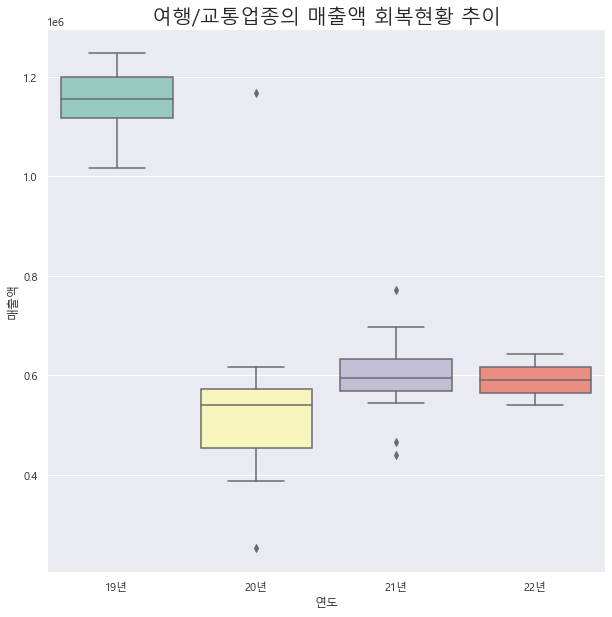

In [36]:
# 1. 여행 / 교통업
plt.figure(figsize = (10,10))

plt.title('여행/교통업종의 매출액 회복현황 추이', fontsize = 20)
big_box_plot_show('여행/교통')

# plt.title('소분류 : 항공업', fontsize = 30)
# small_box_plot_show('여행/교통','항공사')

# plt.title('소분류 : 여행사/자동차임대', fontsize = 30)
# small_box_plot_show('여행/교통','여행사/자동차임대')

# plt.title('소분류 : 대중교통', fontsize = 30)
# small_box_plot_show('여행/교통','대중교통')

plt.show()

In [32]:
df_small_dvcd_2 = df_new[df_new['대분류'] == '의류/잡화']
df_small_dvcd_2 = df_small_dvcd_2[df_small_dvcd_2['구분코드'] == '소분류']
df_small_dvcd_2

,지역코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,2019/05,...,2021/12,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액,19_20증감,20_21증감
소비유형코드,,,,,,,,,,,,,,,,,,,,,
의복/직물,전국,총액,7529614,6150161,6404847,595790,524598,657957,651190,723368,...,587632,505617,400477,소분류,의류/잡화,627467.833333,512513.416667,533737.250000,-18.320368,4.141127
복식잡화,전국,총액,1182568,1025358,1095825,90256,79194,103978,99942,110520,...,99368,89593,73215,소분류,의류/잡화,98547.333333,85446.500000,91318.750000,-13.293950,6.872429
시계/귀금속/안경,전국,총액,2474610,2061175,2281498,201638,187289,227925,211259,232816,...,195287,195055,168290,소분류,의류/잡화,206217.500000,171764.583333,190124.833333,-16.707077,10.689194
화장품,전국,총액,2824093,2349868,2226572,245217,210548,251921,238668,250431,...,199981,186759,151425,소분류,의류/잡화,235341.083333,195822.333333,185547.666667,-16.792117,-5.246933


In [33]:
# 나중에 함수 사용 시, df_new 데이터 사용하면 된다!
def small_box_plot_show(gubun,small_gubun):
    top_df  = df_small_dvcd_2[df_small_dvcd_2['대분류'] == gubun]
    top_df1 = top_df.loc[['  ' + small_gubun]]
    
    amt = top_df1.iloc[0,5:43]

    data = {'연도' : ['19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년','19년',
                      '20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년','20년',
                      '21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년','21년',
                      '22년','22년'],
           '매출액' : amt}
    frame = DataFrame(data)
    frame
    
    sns.boxplot(y='매출액',x='연도',palette='Set3',data=frame)
    plt.show()

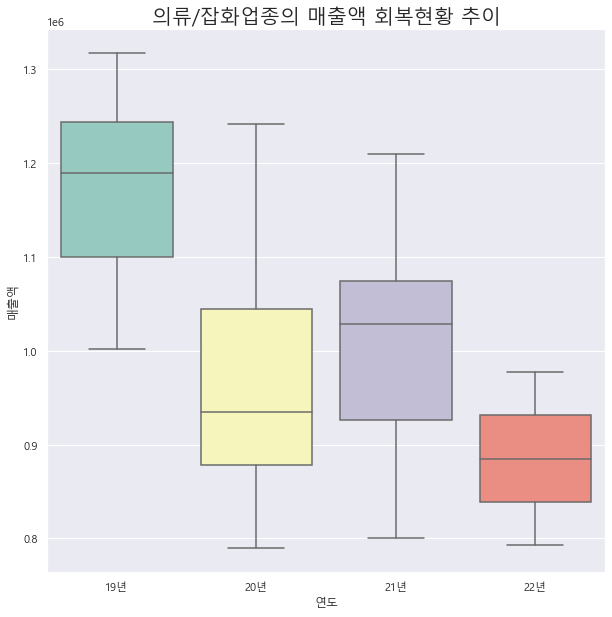

In [37]:
# 2. 의류 / 잡화
plt.figure(figsize = (10,10))

plt.title('의류/잡화업종의 매출액 회복현황 추이', fontsize = 20)
big_box_plot_show('의류/잡화')

# plt.title('소분류 : 의복/직물', fontsize = 30)
# small_box_plot_show('의류/잡화','의복/직물')

# plt.title('소분류 : 복식잡화', fontsize = 30)
# small_box_plot_show('의류/잡화','복식잡화')

# plt.title('소분류 : 시계/귀금속/안경', fontsize = 30)
# small_box_plot_show('의류/잡화','시계/귀금속/안경')

# plt.title('소분류 : 화장품', fontsize = 30)
# small_box_plot_show('의류/잡화','화장품')

plt.show()

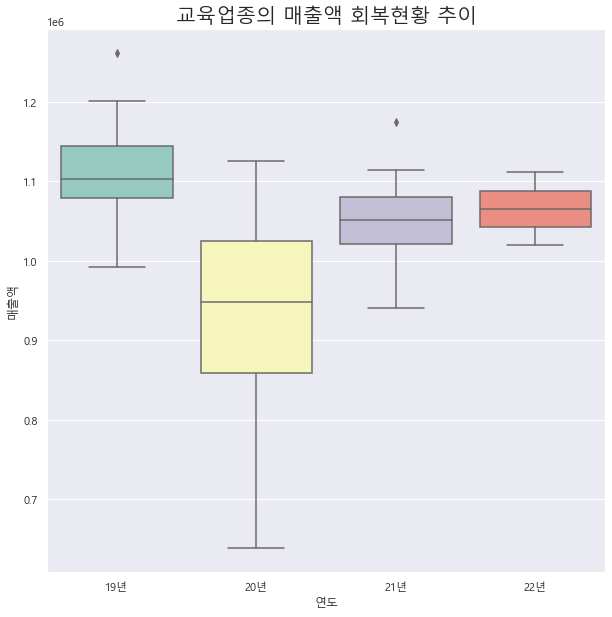

In [38]:
# 3. 교육
plt.figure(figsize = (10,10))

plt.title('교육업종의 매출액 회복현황 추이', fontsize = 20)
big_box_plot_show('교육')

plt.show()

In [39]:
# 교육업종의 경우 업종 세분화 안되있으므로 세부분석자료 : 지역별 매출액 현황으로 대체!
df_edu_dvcd = df[df['대분류'] == '교육']
df_edu_dvcd = df_edu_dvcd[df_edu_dvcd['금액구분코드'] == '총액']
df_edu_dvcd = df_edu_dvcd[df_edu_dvcd['지역코드'] != '전국']
del df_edu_dvcd['통계표']
del df_edu_dvcd['단위']
del df_edu_dvcd['변환']

df_edu_dvcd['19년월평균매출액'] = df_edu_dvcd['19년'] / 12
df_edu_dvcd['20년월평균매출액'] = df_edu_dvcd['20년'] / 12
df_edu_dvcd['21년월평균매출액'] = df_edu_dvcd['21년'] / 12

df_edu_dvcd['19_20증감'] = (df_edu_dvcd['20년월평균매출액'] - df_edu_dvcd['19년월평균매출액']) / df_edu_dvcd['19년월평균매출액'] * 100
df_edu_dvcd['20_21증감'] = (df_edu_dvcd['21년월평균매출액'] - df_edu_dvcd['20년월평균매출액']) / df_edu_dvcd['20년월평균매출액'] * 100

df_edu_dvcd.head()

,지역코드,소비유형코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,...,2021/12,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액,19_20증감,20_21증감
150,서울,교육,총액,4475560,3794966,4238360,369183,353481,401748,309855,...,355361,361818,332927,대분류,교육,372963.333333,316247.166667,353196.666667,-15.206901,11.683741
232,부산,교육,총액,662850,530657,638970,56558,53917,58364,49533,...,48134,52453,48635,대분류,교육,55237.500000,44221.416667,53247.500000,-19.943124,20.411113
314,대구,교육,총액,531692,423098,507424,43924,40418,46935,40563,...,50152,45634,38396,대분류,교육,44307.666667,35258.166667,42285.333333,-20.424231,19.930607
396,인천,교육,총액,542807,428074,480715,53630,48014,55678,47728,...,41386,42419,39009,대분류,교육,45233.916667,35672.833333,40059.583333,-21.136979,12.297173
478,광주,교육,총액,374251,314799,324079,33957,31329,33269,28875,...,27163,28905,26626,대분류,교육,31187.583333,26233.250000,27006.583333,-15.885595,2.947913


In [40]:
region = list()

for idx in range(len(df_edu_dvcd['지역코드'])):
    if df_edu_dvcd.index[idx] == 150 or df_edu_dvcd.index[idx] == 724 or df_edu_dvcd.index[idx] == 396:
        region.append('수도권')
    elif df_edu_dvcd.index[idx] == 232 or df_edu_dvcd.index[idx] == 314 or df_edu_dvcd.index[idx] == 642 or df_edu_dvcd.index[idx] == 1216 or df_edu_dvcd.index[idx] == 1298:
        region.append('경상')
    elif df_edu_dvcd.index[idx] == 560 or df_edu_dvcd.index[idx] == 888 or df_edu_dvcd.index[idx] == 970:
        region.append('충청')
    elif df_edu_dvcd.index[idx] == 478 or df_edu_dvcd.index[idx] == 1052 or df_edu_dvcd.index[idx] == 1134:
        region.append('호남')
    elif df_edu_dvcd.index[idx] == 806 or df_edu_dvcd.index[idx] == 1380 or df_edu_dvcd.index[idx] == 1462:
        region.append('강원/제주/기타')
    else:
        region.append('기타')
        
df_edu_dvcd['지역재구분'] = region
df_edu_dvcd.head()

,지역코드,소비유형코드,금액구분코드,19년,20년,21년,2019/01,2019/02,2019/03,2019/04,...,2022/01,2022/02,구분코드,대분류,19년월평균매출액,20년월평균매출액,21년월평균매출액,19_20증감,20_21증감,지역재구분
150,서울,교육,총액,4475560,3794966,4238360,369183,353481,401748,309855,...,361818,332927,대분류,교육,372963.333333,316247.166667,353196.666667,-15.206901,11.683741,수도권
232,부산,교육,총액,662850,530657,638970,56558,53917,58364,49533,...,52453,48635,대분류,교육,55237.500000,44221.416667,53247.500000,-19.943124,20.411113,경상
314,대구,교육,총액,531692,423098,507424,43924,40418,46935,40563,...,45634,38396,대분류,교육,44307.666667,35258.166667,42285.333333,-20.424231,19.930607,경상
396,인천,교육,총액,542807,428074,480715,53630,48014,55678,47728,...,42419,39009,대분류,교육,45233.916667,35672.833333,40059.583333,-21.136979,12.297173,수도권
478,광주,교육,총액,374251,314799,324079,33957,31329,33269,28875,...,28905,26626,대분류,교육,31187.583333,26233.250000,27006.583333,-15.885595,2.947913,호남


In [60]:
pv_19 = pd.pivot_table(df_edu_dvcd, values = '19년월평균매출액', index = ['지역재구분'], aggfunc = 'sum')
pv_19

,19년월평균매출액
지역재구분,
강원/제주/기타,33508.750000
경상,187634.166667
수도권,736537.083333
충청,93303.416667
호남,66570.416667


In [61]:
pv_20 = pd.pivot_table(df_edu_dvcd, values = '20년월평균매출액', index = ['지역재구분'], aggfunc = 'sum')
pv_20

,20년월평균매출액
지역재구분,
강원/제주/기타,28759.000000
경상,154405.500000
수도권,608685.916667
충청,78270.166667
호남,59275.916667


In [62]:
pv_21 = pd.pivot_table(df_edu_dvcd, values = '21년월평균매출액', index = ['지역재구분'], aggfunc = 'sum')
pv_21

,21년월평균매출액
지역재구분,
강원/제주/기타,30355.166667
경상,180041.500000
수도권,689848.583333
충청,85140.583333
호남,62375.916667


In [63]:
pv_fin = pd.merge(pv_19,pv_20,on = '지역재구분',how = 'left')
pv_fin

,19년월평균매출액,20년월평균매출액
지역재구분,,
강원/제주/기타,33508.750000,28759.000000
경상,187634.166667,154405.500000
수도권,736537.083333,608685.916667
충청,93303.416667,78270.166667
호남,66570.416667,59275.916667


In [64]:
pv_fin = pd.merge(pv_fin,pv_21,on = '지역재구분',how = 'left')
pv_fin

,19년월평균매출액,20년월평균매출액,21년월평균매출액
지역재구분,,,
강원/제주/기타,33508.750000,28759.000000,30355.166667
경상,187634.166667,154405.500000,180041.500000
수도권,736537.083333,608685.916667,689848.583333
충청,93303.416667,78270.166667,85140.583333
호남,66570.416667,59275.916667,62375.916667


In [65]:
pv_fin['증감_19_20'] = (pv_fin['20년월평균매출액'] - pv_fin['19년월평균매출액']) / pv_fin['19년월평균매출액'] * 100
pv_fin

,19년월평균매출액,20년월평균매출액,21년월평균매출액,증감_19_20
지역재구분,,,,
강원/제주/기타,33508.750000,28759.000000,30355.166667,-14.174656
경상,187634.166667,154405.500000,180041.500000,-17.709284
수도권,736537.083333,608685.916667,689848.583333,-17.358415
충청,93303.416667,78270.166667,85140.583333,-16.112218
호남,66570.416667,59275.916667,62375.916667,-10.957570


In [66]:
pv_fin['증감_20_21'] = (pv_fin['21년월평균매출액'] - pv_fin['20년월평균매출액']) / pv_fin['20년월평균매출액'] * 100
pv_fin

,19년월평균매출액,20년월평균매출액,21년월평균매출액,증감_19_20,증감_20_21
지역재구분,,,,,
강원/제주/기타,33508.750000,28759.000000,30355.166667,-14.174656,5.550147
경상,187634.166667,154405.500000,180041.500000,-17.709284,16.603036
수도권,736537.083333,608685.916667,689848.583333,-17.358415,13.334080
충청,93303.416667,78270.166667,85140.583333,-16.112218,8.777823
호남,66570.416667,59275.916667,62375.916667,-10.957570,5.229780


In [74]:
X = list(pv_fin.index)
Y1 = list(pv_fin['증감_19_20'])
Y2 = list(pv_fin['증감_20_21'])

In [85]:
matplotlib.rcParams['axes.unicode_minus'] = False

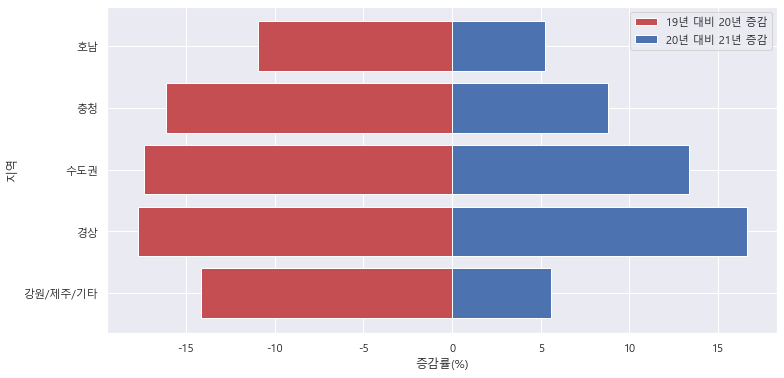

In [91]:
plt.figure(figsize=(12,6))
plt.barh(X, Y1, color='r', label='19년 대비 20년 증감')
plt.barh(X, Y2, color='b', label='20년 대비 21년 증감')
plt.xlabel('증감률(%)')
plt.ylabel('지역')
plt.legend()
plt.show()